# EDA and Cleaning 

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("./data/alter_psychologists_list_anonymous_dataset.csv", index_col=0)

In [21]:
df.sample(10).T

,697,666,646,571,581,502,715,559,248,678
city,Ставрополь,Анталья,Санкт-Петербург,Тбилиси,Москва,Санкт-Петербург,Санкт-Петербург,Нетания,Липецк,Москва
city_details,NaN,NaN,м. Площадь Восстания,NaN,м. Нагатинская,м. Маяковская / Площадь Восстания,м. Новочеркасская,NaN,NaN,онлайн
experience,5,11,6,7,5,8,6,7,3,5
private_experience,4,9,7,6,6,6,6,7,0,5
alter_experience,1,2,0,1,1,4,3,1,0,2
sex,F,F,F,M,F,M,F,F,M,F
age,26.0,33.0,31.0,30.0,37.0,39.0,43.0,39.0,36.0,33.0
marital_status,single,NaN,married,married,married,married,married,married,single,married
has_children,False,NaN,False,False,True,False,True,True,False,False
allow_time_request,True,True,True,True,True,True,True,True,True,True


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 750
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    751 non-null    object 
 1   city_details            465 non-null    object 
 2   experience              751 non-null    int64  
 3   private_experience      751 non-null    int64  
 4   alter_experience        751 non-null    int64  
 5   sex                     743 non-null    object 
 6   age                     715 non-null    float64
 7   marital_status          640 non-null    object 
 8   has_children            630 non-null    object 
 9   allow_time_request      751 non-null    bool   
 10  experimentGroup         751 non-null    bool   
 11  working_with.family     751 non-null    bool   
 12  working_with.adults     751 non-null    bool   
 13  working_with.lgbt       751 non-null    bool   
 14  working_with.believer   751 non-null    bool   

In [23]:
#удалим неактуальные признаки
df = df.drop(["city_details", "allow_time_request", "experimentGroup"], axis=1)

In [24]:
# Вероятро в только таргете price есть выброс
df.describe().T

,count,mean,std,min,25%,50%,75%,max
experience,751.0,7.930759,4.900394,1.0,4.0,7.0,10.0,30.0
private_experience,751.0,5.532623,5.664268,0.0,0.0,5.0,9.0,34.0
alter_experience,751.0,1.154461,1.237246,0.0,0.0,1.0,2.0,5.0
age,715.0,39.216783,8.030352,24.0,33.0,38.0,44.0,72.0
education_count,751.0,7.110519,4.241985,1.0,4.0,6.0,9.0,30.0
competences_count,751.0,5.376831,3.567325,2.0,4.0,4.0,4.0,31.0
methods_count,751.0,1.707057,0.885101,1.0,1.0,1.0,2.0,7.0
expertise_count,751.0,3.115846,1.887828,0.0,2.0,3.0,5.0,9.0
features_of_work_count,751.0,11.841545,3.638341,0.0,9.0,12.0,14.0,22.0
price,751.0,4134.908123,1608.448598,1500.0,3000.0,4000.0,5000.0,20000.0


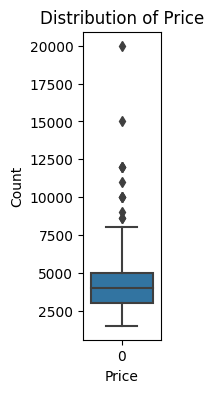

In [25]:
# Определяем выбросы в "price" 
plt.figure(figsize=(1, 4))
sns.boxplot(df['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

In [26]:
# Убираем выбросы в "price" все выше 8_000
df = df[df['price'] <= 8_000]

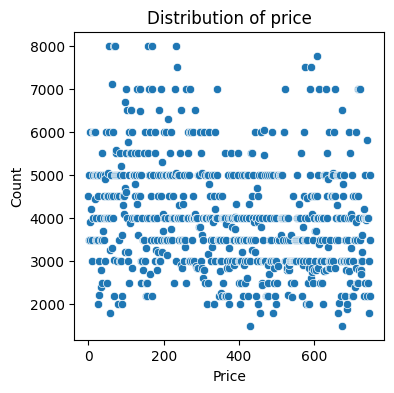

In [27]:
# Определяем выбросы в "price"
plt.figure(figsize=(4, 4))
sns.scatterplot(df['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of price')
plt.savefig('distribution_of_price_plot.png')
plt.show()

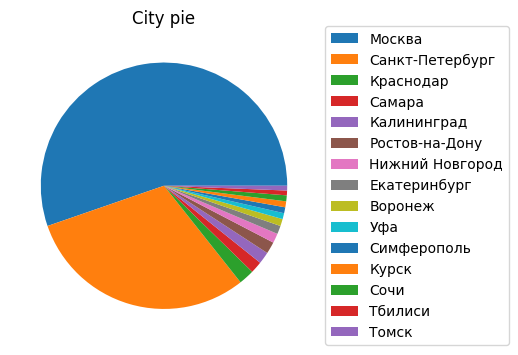

In [28]:
# Получаем pie диаграму городов и выбираем топ 15
city_counts = df['city'].value_counts()[:15]
plt.figure(figsize=(4, 4))
plt.pie(city_counts)
plt.title('City pie')
plt.legend(city_counts.index, bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

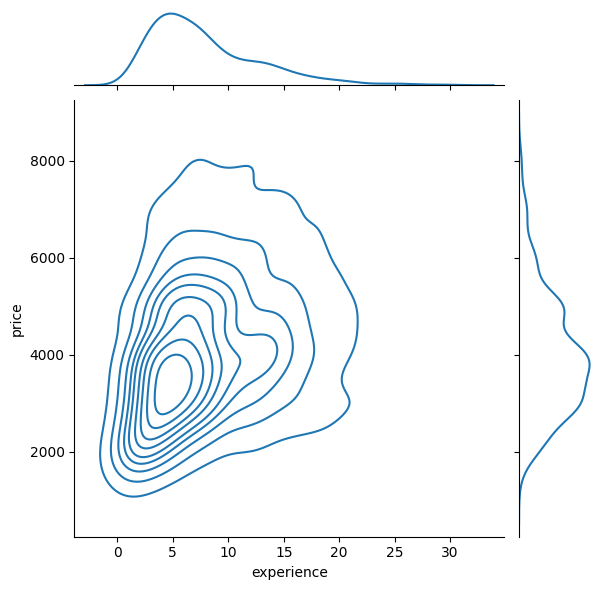

In [29]:
sns.jointplot(data=df, x="experience", y="price",kind="kde")

<Axes: xlabel='experience', ylabel='price'>

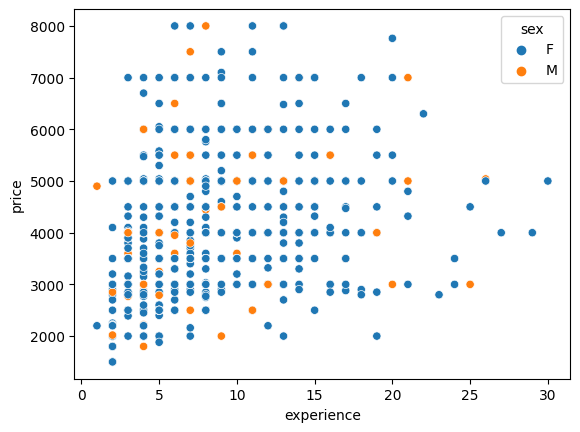

In [30]:
sns.scatterplot(data=df, x="experience", y="price", hue="sex")

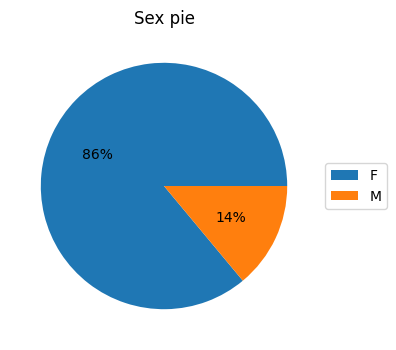

In [31]:
# Получилось что в датасете женщин дольшинство 
city_counts = df['sex'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(city_counts, autopct='%.0f%%')
plt.title('Sex pie')
plt.legend(city_counts.index, bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

### Оптимизируем датасет по памяти 

In [32]:
df_array = df.replace({False: 0, True: 1, "F": 1, "M": 0, "married": 1, "single": 0})

In [33]:
df_array["working_with.family"] = df_array["working_with.family"].astype(np.int8)
df_array["working_with.adults"] = df_array["working_with.adults"].astype(np.int8)
df_array["working_with.lgbt"] = df_array["working_with.lgbt"].astype(np.int8)
df_array["working_with.believer"] = df_array["working_with.believer"].astype(np.int8)
df_array["working_with.fem"] = df_array["working_with.fem"].astype(np.int8)
df_array["working_with.foreigner"] = df_array["working_with.foreigner"].astype(np.int8)
df_array["working_with.elderly"] = df_array["working_with.elderly"].astype(np.int8)

df_array["education_count"] = df_array["education_count"].astype(np.int16)
df_array["competences_count"] = df_array["competences_count"].astype(np.int16)
df_array["methods_count"] = df_array["methods_count"].astype(np.int16)
df_array["expertise_count"] = df_array["expertise_count"].astype(np.int16)

df_array["experience"] = df_array["experience"].astype(np.int16)
df_array["private_experience"] = df_array["private_experience"].astype(np.int16)
df_array["alter_experience"] = df_array["alter_experience"].astype(np.int16)
df_array["features_of_work_count"] = df_array["features_of_work_count"].astype(np.int16)

df_array["age"] = df_array["age"].astype(np.float16)
df_array["sex"] = df_array["sex"].astype(np.float16)
df_array["marital_status"] = df_array["marital_status"].astype(np.float16)
df_array["has_children"] = df_array["has_children"].astype(np.float16)

In [34]:
df_array.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 750
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    739 non-null    object 
 1   experience              739 non-null    int16  
 2   private_experience      739 non-null    int16  
 3   alter_experience        739 non-null    int16  
 4   sex                     731 non-null    float16
 5   age                     704 non-null    float16
 6   marital_status          628 non-null    float16
 7   has_children            618 non-null    float16
 8   working_with.family     739 non-null    int8   
 9   working_with.adults     739 non-null    int8   
 10  working_with.lgbt       739 non-null    int8   
 11  working_with.believer   739 non-null    int8   
 12  working_with.fem        739 non-null    int8   
 13  working_with.foreigner  739 non-null    int8   
 14  working_with.elderly    739 non-null    int8   

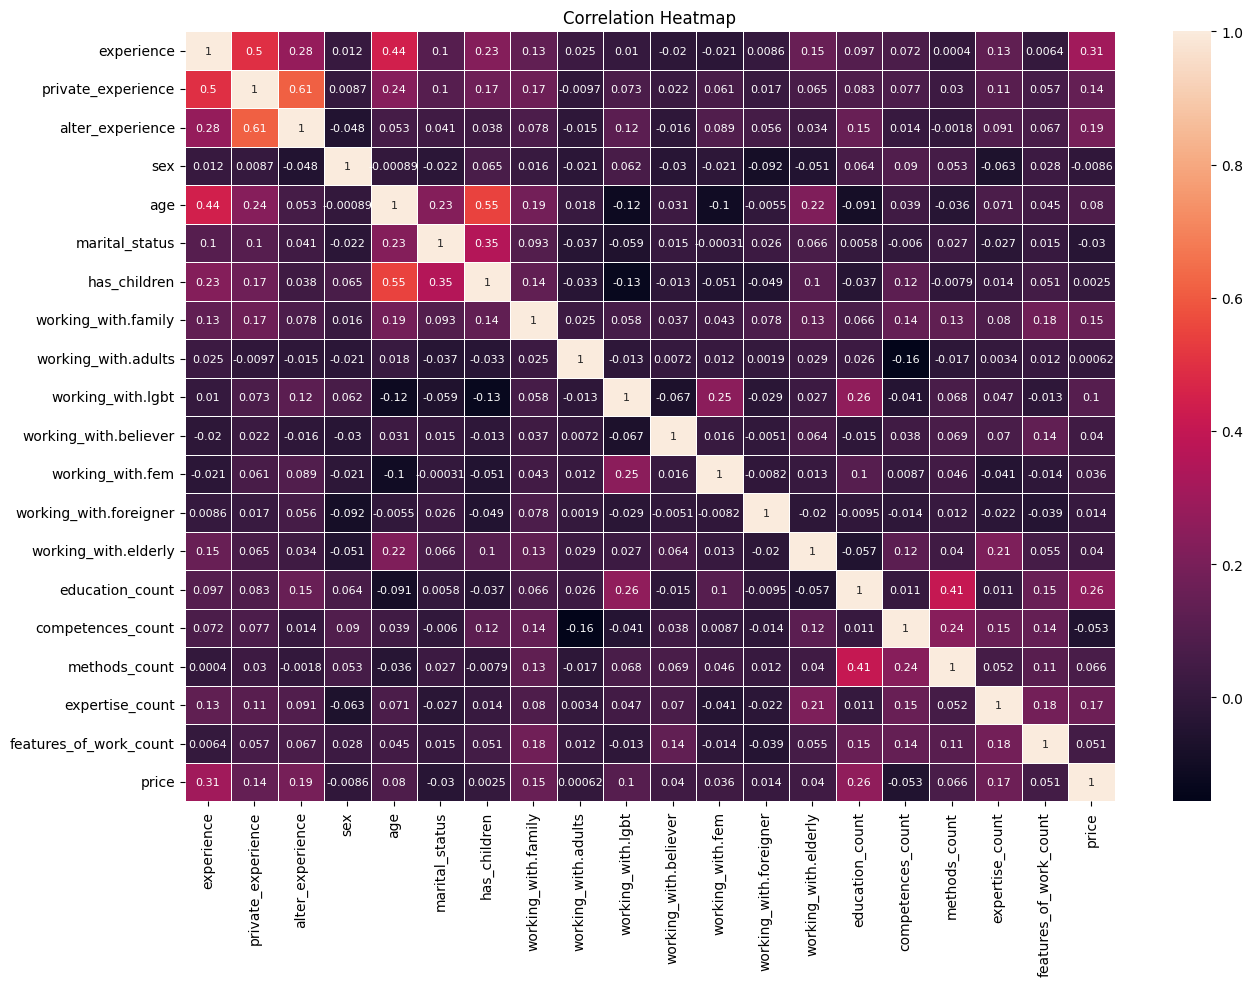

In [35]:
# Создание корреляционной матрицы через heatmap 
correlation_matrix = df_array.drop(["city"], axis=1).corr()
plt.figure(figsize=(15, 10))
svm = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.savefig('correlation_plot.png', bbox_inches='tight')
plt.show()

In [36]:
# Можно понять, что корреляция по price оч. слабая

In [37]:
df_array.drop(["city"], axis=1).corr().price

experience                0.306422
private_experience        0.144581
alter_experience          0.192257
sex                      -0.008574
age                       0.080184
marital_status           -0.029857
has_children              0.002547
working_with.family       0.151703
working_with.adults       0.000620
working_with.lgbt         0.101969
working_with.believer     0.040340
working_with.fem          0.036452
working_with.foreigner    0.014254
working_with.elderly      0.040474
education_count           0.263628
competences_count        -0.053308
methods_count             0.065641
expertise_count           0.165560
features_of_work_count    0.051462
price                     1.000000
Name: price, dtype: float64

In [38]:
#Сохраним как pickle
df_array.to_pickle("./data/alter_psychologists_data_cleaning.p")